## Sinusoidal poisson generator example
* https://nest-simulator.readthedocs.io/en/latest/auto_examples/sinusoidal_poisson_generator.html



In [1]:
import matplotlib.pyplot as plt
import nest
import numpy as np

nest.ResetKernel()  # in case we run the script multiple times from iPython


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0-post0.dev0
 Built: Oct  2 2024 11:54:50

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



[admin:1946996] shmem: mmap: an error occurred while determining whether or not /tmp/ompi.admin.1000/jf.0/1529872384/shared_mem_cuda_pool.admin could be created.
[admin:1946996] create_and_attach: unable to create shared memory BTL coordinating structure :: size 134217728 


In [2]:
nest.resolution = 0.01

num_nodes = 2
g = nest.Create(
    "sinusoidal_poisson_generator",
    n=num_nodes,
    params={"rate": [10000.0, 0.0], "amplitude": [5000.0, 10000.0], "frequency": [10.0, 5.0], "phase": [0.0, 90.0]},
)


m = nest.Create("multimeter", num_nodes, {"interval": 0.1, "record_from": ["rate"]})
s = nest.Create("spike_recorder", num_nodes)

nest.Connect(m, g, "one_to_one")
nest.Connect(g, s, "one_to_one")
print(m.get())
nest.Simulate(200)

{'element_type': ('recorder', 'recorder'), 'events': ({'senders': array([], dtype=int64), 'times': array([], dtype=float64)}, {'senders': array([], dtype=int64), 'times': array([], dtype=float64)}), 'frozen': (False, False), 'global_id': (3, 4), 'interval': (0.1, 0.1), 'label': ('', ''), 'local': (True, True), 'model': ('multimeter', 'multimeter'), 'model_id': (93, 93), 'n_events': (0, 0), 'node_uses_wfr': (False, False), 'offset': (0.0, 0.0), 'origin': (0.0, 0.0), 'record_from': (('rate',), ('rate',)), 'record_to': ('memory', 'memory'), 'start': (0.0, 0.0), 'stop': (1.7976931348623157e+308, 1.7976931348623157e+308), 'thread': (0, 0), 'thread_local_id': (-1, -1), 'time_in_steps': (False, False), 'vp': (0, 0)}

Oct 10 07:54:58 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.01 ms.

Oct 10 07:54:58 NodeManager::prepare_nodes [Info]: 
    Preparing 6 nodes for simulation.

Oct 10 07:54:58 SimulationManager::start_updating_ [Info]: 
    Number of local 

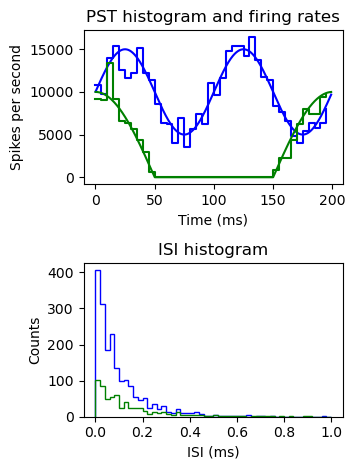

In [3]:
colors = ["b", "g"]

for j in range(num_nodes):
    ev = m[j].events
    t = ev["times"]
    r = ev["rate"]

    spike_times = s[j].events["times"]
    plt.subplot(221)
    h, e = np.histogram(spike_times, bins=np.arange(0.0, 201.0, 5.0))
    plt.plot(t, r, color=colors[j])
    plt.step(e[:-1], h * 1000 / 5.0, color=colors[j], where="post")
    plt.title("PST histogram and firing rates")
    plt.ylabel("Spikes per second")
    plt.xlabel("Time (ms)")

    plt.subplot(223)
    plt.hist(np.diff(spike_times), bins=np.arange(0.0, 1.005, 0.02), histtype="step", color=colors[j])
    plt.title("ISI histogram")
    plt.xlabel("ISI (ms)")
    plt.ylabel("Counts")
    plt.tight_layout()

In [8]:
nest.ResetKernel()
nest.local_num_threads = 4


Oct 10 07:55:46 NodeManager::prepare_nodes [Info]: 
    Preparing 28 nodes for simulation.

Oct 10 07:55:46 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 28
    Simulation time (ms): 200
    Number of OpenMP threads: 4
    Number of MPI processes: 1

Oct 10 07:55:46 SimulationManager::run [Info]: 
    Simulation finished.


Text(0.5, 1.0, 'Individual spike trains for each target')

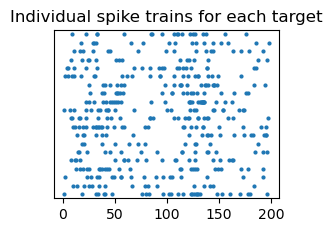

In [9]:
g = nest.Create(
    "sinusoidal_poisson_generator",
    params={"rate": 100.0, "amplitude": 50.0, "frequency": 10.0, "phase": 0.0, 
            "individual_spike_trains": True}, # this is the only difference
)
p = nest.Create("parrot_neuron", 20)
s = nest.Create("spike_recorder")

nest.Connect(g, p, "all_to_all")
nest.Connect(p, s, "all_to_all")

nest.Simulate(200)
ev = s.events
plt.subplot(222)
plt.plot(ev["times"], ev["senders"] - min(ev["senders"]), "o", markersize=2)
plt.ylim([-0.5, 19.5])
plt.yticks([])
plt.title("Individual spike trains for each target")



Oct 10 07:56:01 NodeManager::prepare_nodes [Info]: 
    Preparing 25 nodes for simulation.

Oct 10 07:56:01 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 25
    Simulation time (ms): 200
    Number of OpenMP threads: 4
    Number of MPI processes: 1

Oct 10 07:56:01 SimulationManager::run [Info]: 
    Simulation finished.


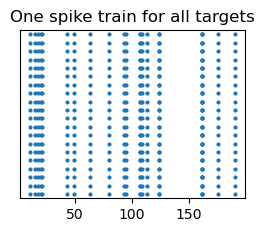

In [10]:
nest.ResetKernel()
nest.local_num_threads = 4

g = nest.Create(
    "sinusoidal_poisson_generator",
    params={"rate": 100.0, "amplitude": 50.0, "frequency": 10.0, "phase": 0.0, 
            "individual_spike_trains": False}, # this is the only difference
)
p = nest.Create("parrot_neuron", 20)
s = nest.Create("spike_recorder")

nest.Connect(g, p, "all_to_all")
nest.Connect(p, s, "all_to_all")

nest.Simulate(200)
ev = s.events
plt.subplot(224)
plt.plot(ev["times"], ev["senders"] - min(ev["senders"]), "o", markersize=2)
plt.ylim([-0.5, 19.5])
plt.yticks([])
plt.title("One spike train for all targets")
plt.show()

In [20]:
nest.help(Create)

NameError: name 'Create' is not defined

In [21]:
help(nest.Create)

Help on function Create in module nest.lib.hl_api_nodes:

Create(model, n=1, params=None, positions=None)
    Create one or more nodes.

    Generates `n` new network objects of the supplied model type. If `n` is not
    given, a single node is created. Note that if setting parameters of the
    nodes fail, the nodes will still have been created.

    Note
    ----
    During network construction, create all nodes representing model neurons first, then all nodes
    representing devices (generators, recorders, or detectors), or all devices first and then all neurons.
    Otherwise, network connection can be slow, especially in parallel simulations of networks
    with many devices.

    Parameters
    ----------
    model : str
        Name of the model to create
    n : int, optional
        Number of nodes to create
    params : dict or list, optional
        Parameters for the new nodes. Can be any of the following:

        - A dictionary with either single values or lists of size 